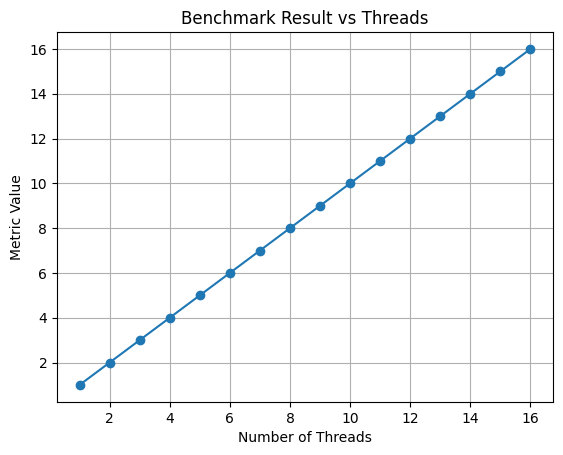

In [ ]:
import subprocess
import re
import matplotlib.pyplot as plt

# Use grep to list files that contain "Running with"
result = subprocess.run("grep -l 'Running with' masstree_insert_*", shell=True, capture_output=True, text=True)
files = result.stdout.split()

data = []
for fname in files:
    with open(fname, 'r') as f:
        lines = f.readlines()
    
    # Extract thread count from the header line
    m_thread = re.search(r"Running with\s+(\d+)", lines[0])
    if not m_thread:
        continue
    thread = int(m_thread.group(1))
    
    # Extract latency from the "Masstree Parallel Insertion:" line
    latency = None
    for line in lines:
        m_latency = re.search(r"Masstree Parallel Insertion:\s*([0-9.]+)\s*ms", line)
        if m_latency:
            latency = float(m_latency.group(1))
            break
    
    if latency is not None:
        data.append((thread, latency))

# Sort data by thread count
data.sort(key=lambda x: x[0])
threads, latencies = zip(*data)

# Plot the latency versus the thread count
plt.plot(threads, latencies, marker='o', linestyle='-')
plt.xlabel("Number of Threads")
plt.ylabel("Latency (ms)")
plt.title("Masstree Parallel Insertion Latency vs Threads")
plt.grid(True)
plt.show()

